# Mount Google Drive to access zip file with data

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip data into the *splits* directory

In [ ]:
# create directory for data
!mkdir splits

project_dir = "/content/drive/MyDrive/8 Semestr/Projekt SzUM/"
split1_dir = project_dir + "split1_final"
split2_dir = project_dir + "split2_final"
split3_dir = project_dir + "split3_final"

# unzip files from zip folder
!unzip "/content/drive/MyDrive/8 Semestr/Projekt SzUM/split1_final" -d "splits/"
!unzip "/content/drive/MyDrive/8 Semestr/Projekt SzUM/split2_final" -d "splits/"
!unzip "/content/drive/MyDrive/8 Semestr/Projekt SzUM/split3_final" -d "splits/"

# Import train, validation, and test datasets

In [3]:
from keras.preprocessing.image import ImageDataGenerator

fig_size = 225

datagen_train = ImageDataGenerator(rescale=1./fig_size)
datagen_val = ImageDataGenerator(rescale=1./fig_size)
datagen_test = ImageDataGenerator(rescale=1./fig_size)


# Create, train, and validate the model

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import os
import random
import time
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# !pip install tensorflow-addons
# import tensorflow_addons as tfa

learning_rate = 0.001
epochs = 15
batch_size = 16

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(fig_size, fig_size, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

opt = Adam(learning_rate=learning_rate)
checkpoint_path = "gdfit_1_20e_16b-{epoch:1d}.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,  # Save only the weights
    save_freq='epoch' # Save for every epoch
)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


model_id = 1
# filepath = project_dir + f"MODEL{model_id}.h5"
filepath = project_dir + f"MODEL{model_id}.h5"

model.load_weights(filepath)

# train_set, val_set, test_set = [], [], []
# for split_id in range(1,4):
#     data_dir = f'splits/split{split_id}_final/'
#     train_set.append(datagen_train.flow_from_directory(directory=data_dir+"train",target_size=(fig_size,fig_size),class_mode='categorical', shuffle=False))
#     val_set.append(datagen_val.flow_from_directory(directory=data_dir+"val",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False))
#     test_set.append(datagen_test.flow_from_directory(directory=data_dir+"test",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False))


# Clear GPU RAM if needed

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

# Metrics using scikit-learn

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Lists to store metrics for each epoch
accuracy_list_train, recall_list_train, precision_list_train, f1_list_train = [], [], [], []
accuracy_list_val, recall_list_val, precision_list_val, f1_list_val = [], [], [], []
accuracy_list_test, recall_list_test, precision_list_test, f1_list_test = [], [], [], []

for split_number in range(1,4):
    data_dir = f'splits/split{split_number}_final/'
    train_set = datagen_train.flow_from_directory(directory=data_dir+"train",target_size=(fig_size,fig_size),class_mode='categorical', shuffle=False)
    val_set = datagen_val.flow_from_directory(directory=data_dir+"val",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False)
    test_set = datagen_test.flow_from_directory(directory=data_dir+"test",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False)

    # Make predictions on validation dataset
    train_predictions = model.predict(train_set)
    val_predictions = model.predict(val_set)
    test_predictions = model.predict(test_set)

    # Convert predictions to class labels
    train_predicted_labels = np.argmax(train_predictions, axis=1)
    val_predicted_labels = np.argmax(val_predictions, axis=1)
    test_predicted_labels = np.argmax(test_predictions, axis=1)

    # Calculate metrics based on confusion matrix
    accuracy_list_train.append(accuracy_score(train_set.classes, train_predicted_labels))
    recall_list_train.append(recall_score(train_set.classes, train_predicted_labels, average='macro'))
    precision_list_train.append(precision_score(train_set.classes, train_predicted_labels, average='macro'))
    f1_list_train.append(f1_score(train_set.classes, train_predicted_labels, average='macro'))

    accuracy_list_val.append(accuracy_score(val_set.classes, val_predicted_labels))
    recall_list_val.append(recall_score(val_set.classes, val_predicted_labels, average='macro'))
    precision_list_val.append(precision_score(val_set.classes, val_predicted_labels, average='macro'))
    f1_list_val.append(f1_score(val_set.classes, val_predicted_labels, average='macro'))

    accuracy_list_test.append(accuracy_score(test_set.classes, test_predicted_labels))
    recall_list_test.append(recall_score(test_set.classes, test_predicted_labels, average='macro'))
    precision_list_test.append(precision_score(test_set.classes, test_predicted_labels, average='macro'))
    f1_list_test.append(f1_score(test_set.classes, test_predicted_labels, average='macro'))



Found 1225 images belonging to 3 classes.
Found 153 images belonging to 3 classes.
Found 153 images belonging to 3 classes.
5/5 [==============================] - 0s 66ms/step
Found 9805 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
39/39 [==============================] - 2s 51ms/step
Found 9805 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
39/39 [==============================] - 2s 62ms/step


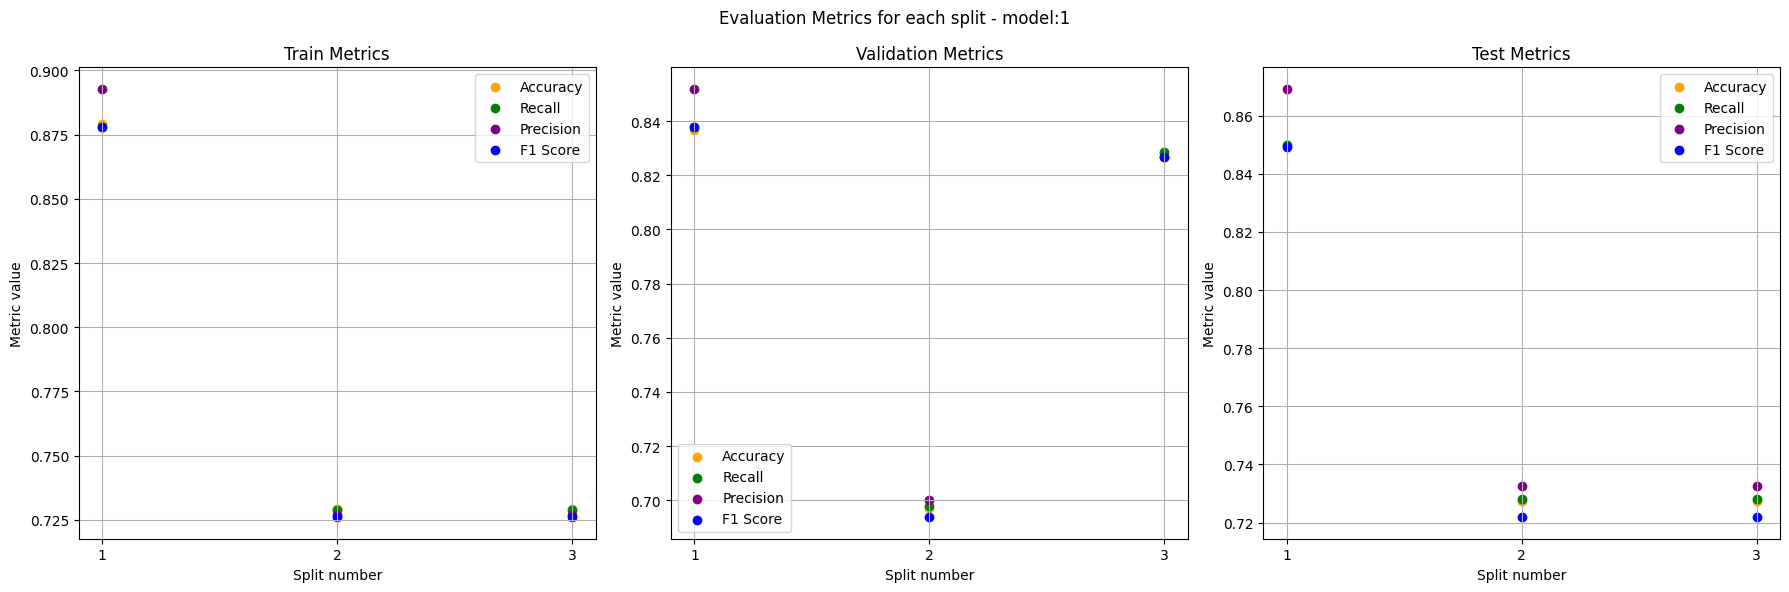

In [25]:
# Plot metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for train metrics
axs[0].scatter(np.arange(len(accuracy_list_train)) + 1, accuracy_list_train, color='orange', label="Accuracy")
axs[0].scatter(np.arange(len(recall_list_train)) + 1, recall_list_train, color='green', label="Recall")
axs[0].scatter(np.arange(len(precision_list_train)) + 1, precision_list_train, color='purple', label="Precision")
axs[0].scatter(np.arange(len(f1_list_train)) + 1, f1_list_train, color='blue', label="F1 Score")
axs[0].set_title('Train Metrics')
axs[0].set_xlabel('Split number')
axs[0].set_ylabel('Metric value')
axs[0].legend()
axs[0].grid(True)  # Add grid
axs[0].set_xticks(np.arange(1, len(accuracy_list_train) + 1, 1))  # Set x-axis ticks as integers

# Scatter plot for validation metrics
axs[1].scatter(np.arange(len(accuracy_list_val)) + 1, accuracy_list_val, color='orange', label="Accuracy")
axs[1].scatter(np.arange(len(recall_list_val)) + 1, recall_list_val, color='green', label="Recall")
axs[1].scatter(np.arange(len(precision_list_val)) + 1, precision_list_val, color='purple', label="Precision")
axs[1].scatter(np.arange(len(f1_list_val)) + 1, f1_list_val, color='blue', label="F1 Score")
axs[1].set_title('Validation Metrics')
axs[1].set_xlabel('Split number')
axs[1].set_ylabel('Metric value')
axs[1].legend()
axs[1].grid(True)  # Add grid
axs[1].set_xticks(np.arange(1, len(accuracy_list_val) + 1, 1))  # Set x-axis ticks as integers

# Scatter plot for test metrics
axs[2].scatter(np.arange(len(accuracy_list_test)) + 1, accuracy_list_test, color='orange', label="Accuracy")
axs[2].scatter(np.arange(len(recall_list_test)) + 1, recall_list_test, color='green', label="Recall")
axs[2].scatter(np.arange(len(precision_list_test)) + 1, precision_list_test, color='purple', label="Precision")
axs[2].scatter(np.arange(len(f1_list_test)) + 1, f1_list_test, color='blue', label="F1 Score")
axs[2].set_title('Test Metrics')
axs[2].set_xlabel('Split number')
axs[2].set_ylabel('Metric value')
axs[2].legend()
axs[2].grid(True)  # Add grid
axs[2].set_xticks(np.arange(1, len(accuracy_list_test) + 1, 1))  # Set x-axis ticks as integers

# title of the plots
fig.suptitle(f"Evaluation Metrics for each split - model:{model_id}")

plt.tight_layout()

# Show the plot
plt.show()



# Plot Confusion Matrix

Found 1225 images belonging to 3 classes.
Found 153 images belonging to 3 classes.
Found 153 images belonging to 3 classes.
5/5 [==============================] - 1s 157ms/step
Train Accuracy: 97.39%
Validation Accuracy: 84.97%
Test Accuracy: 89.54%


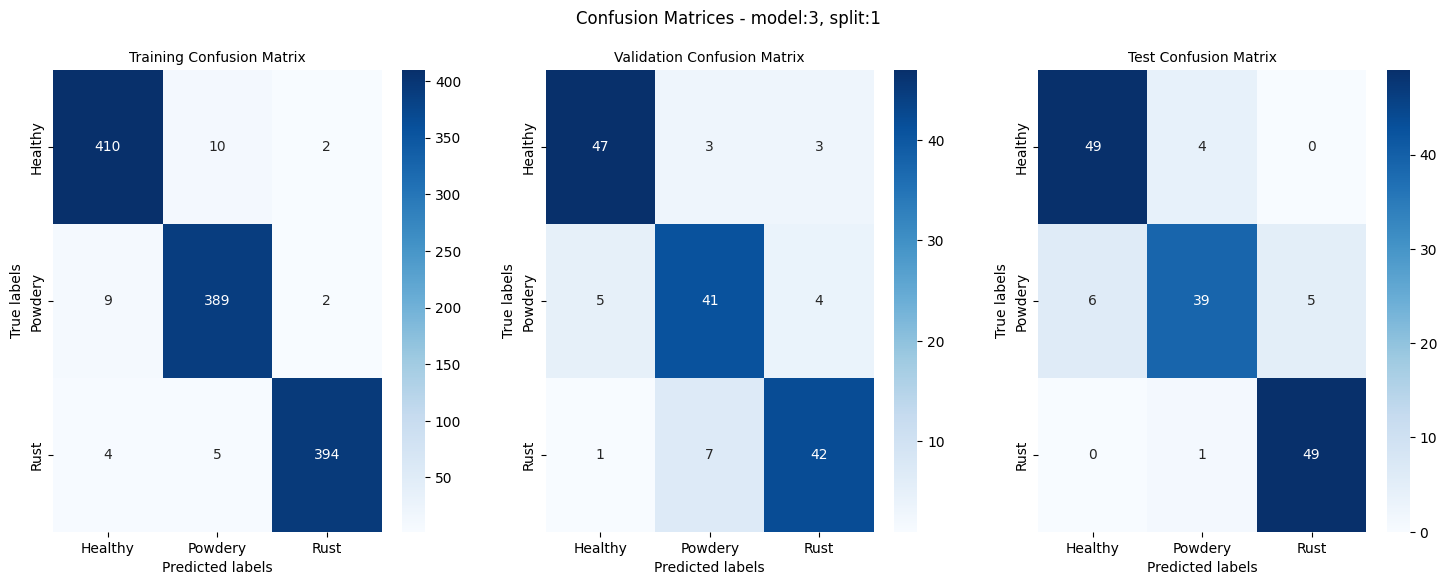




Found 9805 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
39/39 [==============================] - 3s 83ms/step
Train Accuracy: 95.00%
Validation Accuracy: 86.53%
Test Accuracy: 89.22%


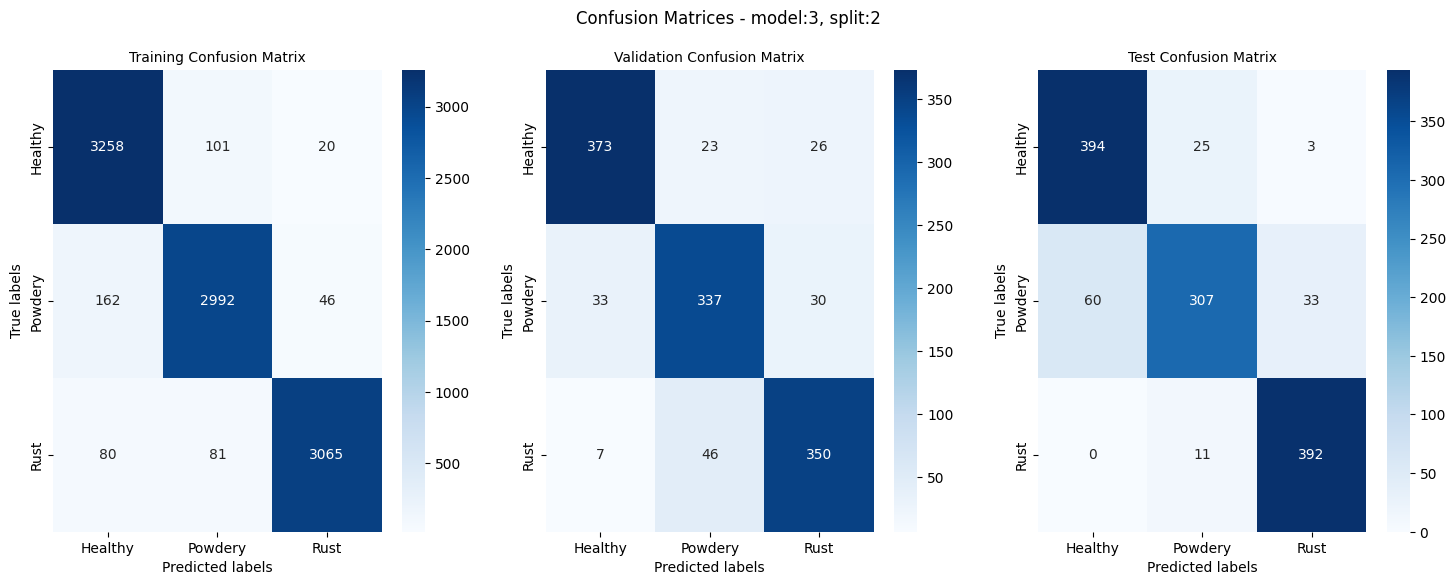




Found 9805 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 1225 images belonging to 3 classes.
39/39 [==============================] - 2s 54ms/step
Train Accuracy: 95.00%
Validation Accuracy: 84.43%
Test Accuracy: 89.22%


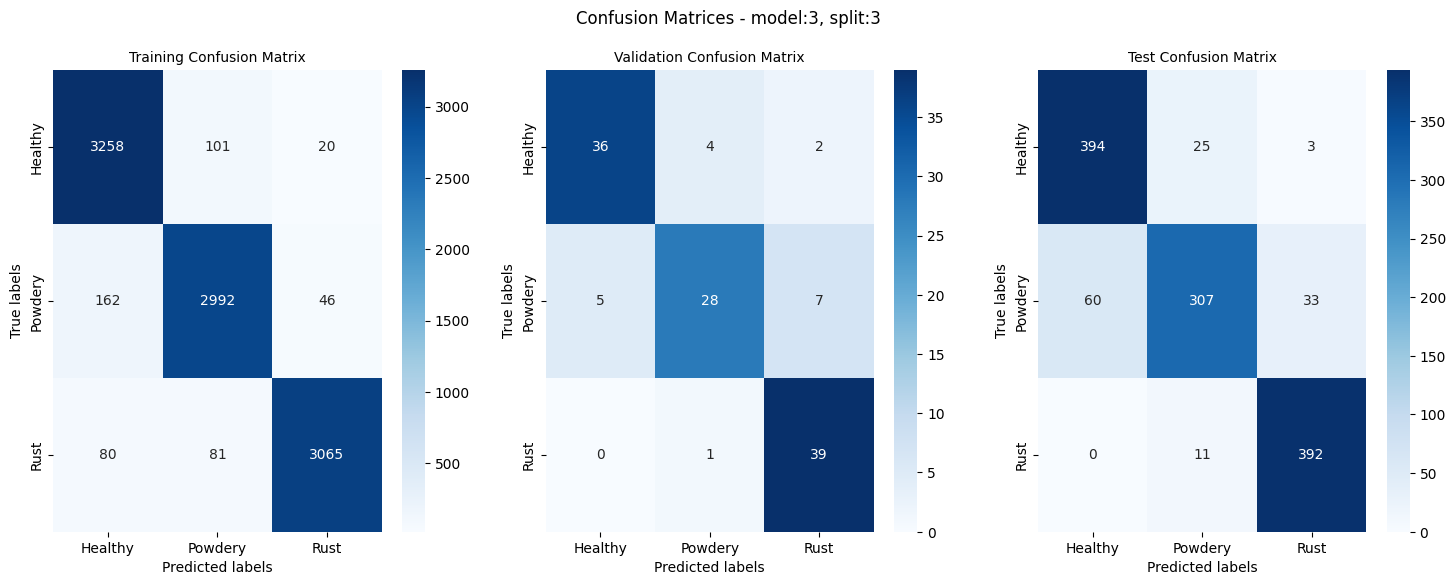

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(matrix, title, ax, class_names):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title, fontsize=10)



# fig.subplots_adjust(wspace=0.5)  # Adjust the horizontal space between subplots

# Load the model weights from the checkpoint file for this epoch
for split_number in range(1,4):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the width of the figure

    data_dir = f'splits/split{split_number}_final/'
    train_set = datagen_train.flow_from_directory(directory=data_dir+"train",target_size=(fig_size,fig_size),class_mode='categorical', shuffle=False)
    val_set = datagen_val.flow_from_directory(directory=data_dir+"val",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False)
    test_set = datagen_test.flow_from_directory(directory=data_dir+"test",target_size=(fig_size,fig_size),class_mode="categorical", shuffle=False)

    # Get the predictions for the training and validation datasets
    train_predictions = model.predict(train_set)
    val_predictions = model.predict(val_set)
    test_predictions = model.predict(test_set)

    # Get the true labels for the training and validation datasets
    train_true_labels = train_set.classes
    val_true_labels = val_set.classes
    test_true_labels = test_set.classes

    # Calculate accuracy
    train_accuracy = accuracy_score(train_true_labels, np.argmax(train_predictions, axis=1))
    val_accuracy = accuracy_score(val_true_labels, np.argmax(val_predictions, axis=1))
    test_accuracy = accuracy_score(test_true_labels, np.argmax(test_predictions, axis=1))

    print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
    print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

    # Compute confusion matrix for training and validation datasets
    train_conf_matrix = confusion_matrix(train_true_labels, np.argmax(train_predictions, axis=1))
    val_conf_matrix = confusion_matrix(val_true_labels, np.argmax(val_predictions, axis=1))
    test_conf_matrix = confusion_matrix(test_true_labels, np.argmax(test_predictions, axis=1))


    # Get the class names from the generator
    class_names = list(val_set.class_indices.keys())

    # Plot confusion matrices side by side
    subtitle = f"Confusion Matrices - model:{model_id}, split:{split_number}" # model_id is 1,2, or 3
    fig.suptitle(subtitle)
    plot_confusion_matrix(train_conf_matrix, f'Training Confusion Matrix', ax1, class_names)
    plot_confusion_matrix(val_conf_matrix, f'Validation Confusion Matrix', ax2, class_names)
    plot_confusion_matrix(test_conf_matrix, f'Test Confusion Matrix', ax3, class_names)

    plt.show()

    print("\n\n")

-----------------------------------